In [1]:
# Title

In [2]:
import pandas as pd
import json

# Load your dataset into a DataFrame (replace 'your_dataset.csv' with your actual file)
data = pd.read_csv('../data/cleaned_dataset_updated.csv')

# # Convert DataFrame to a list of dictionaries
# data_dict_list = data.to_dict(orient='records')
#
# # Save the list of dictionaries as a JSON file
# with open('exoplanet.json', 'w') as json_file:
#     json.dump(data_dict_list, json_file, indent=4)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data.columns

Index(['name', 'distance', 'stellar_magnitude', 'discovery_year',
       'mass_multiplier', 'mass_wrt', 'radius_multiplier', 'radius_wrt',
       'orbital_radius', 'orbital_period', 'eccentricity', 'detection_method',
       'size_score', 'star_planet_interaction', 'orbital_radius_bin',
       'habitable_zone', 'planet_surface_temperature', 'atmospheric_pressure',
       'biosignature_potential', 'radiation_exposure', 'approximated_mass',
       'approximated_radius', 'planet_gravity', 'climate_stability',
       'possibility_of_moon', 'planetary_composition_hypothesis',
       'atmospheric_density', 'normalized_orbital_radius',
       'energy_receipt_score', 'planetary_energy_receipt',
       'combined_planetary_composition_hypothesis'],
      dtype='object')

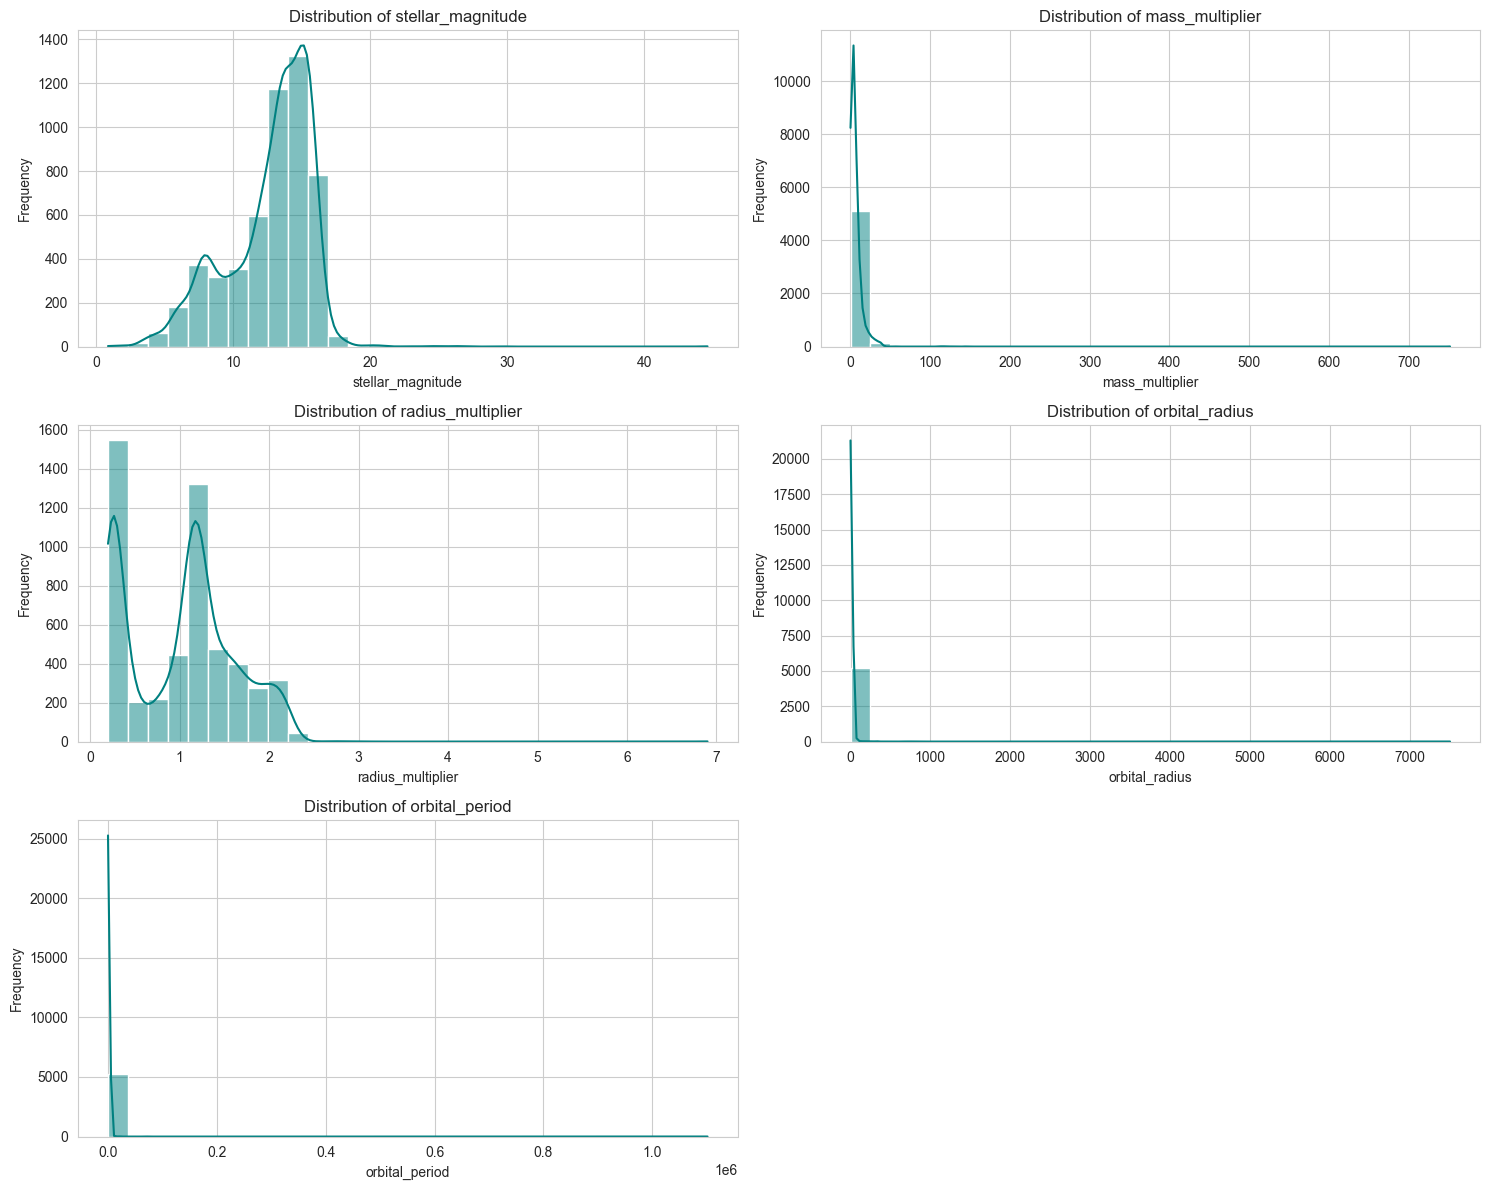

In [5]:
# Visualizing distributions of key numerical columns
numerical_columns = ['stellar_magnitude', 'mass_multiplier', 'radius_multiplier', 'orbital_radius', 'orbital_period']

plt.figure(figsize=(15, 12))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data[col], kde=True, color='teal', bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

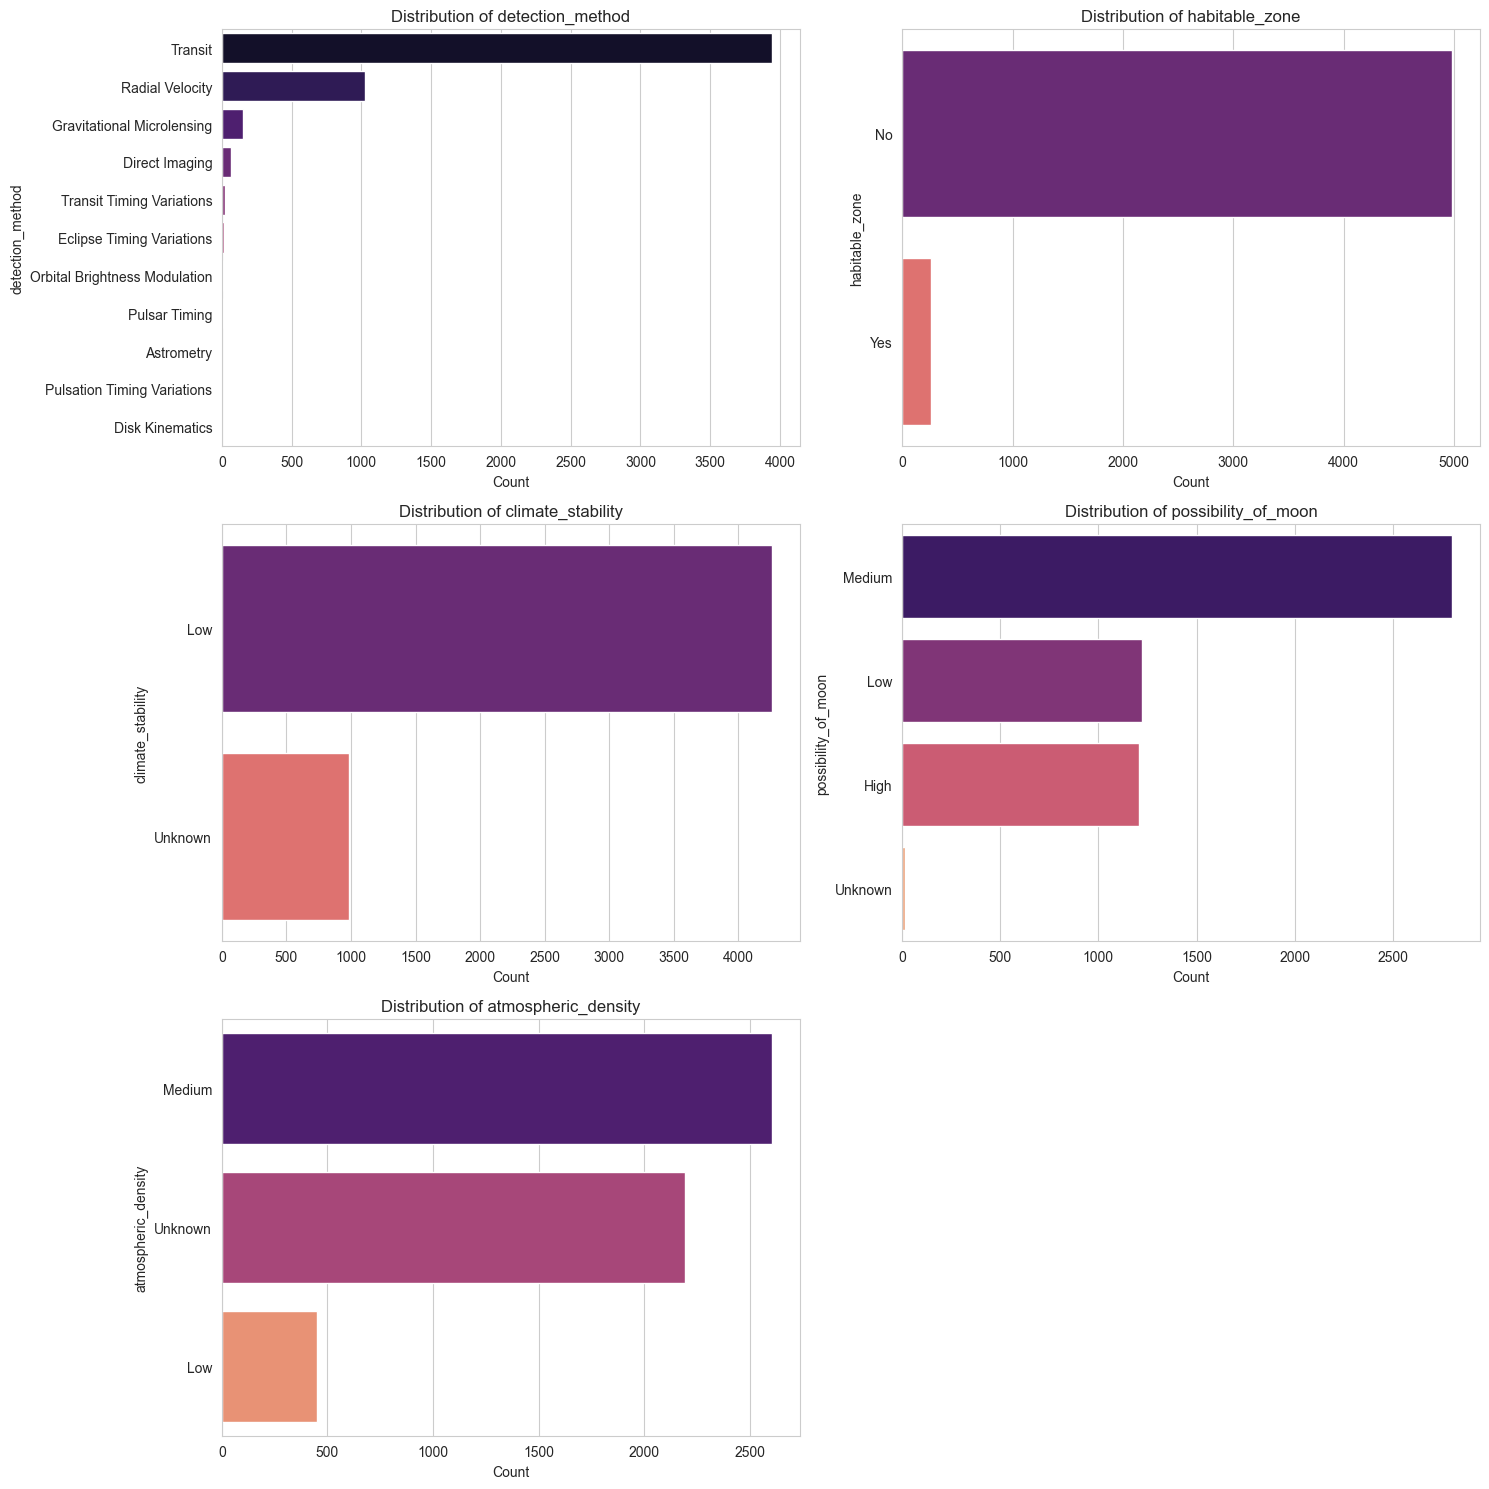

In [6]:
# Visualizing distributions of key categorical columns
categorical_columns = ['detection_method', 'habitable_zone', 'climate_stability', 'possibility_of_moon', 'atmospheric_density']

plt.figure(figsize=(15, 15))

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 2, i)
    sns.countplot(y=data[col], order=data[col].value_counts().index, palette="magma")
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

In [7]:
#Detection Method: The majority of exoplanets in this dataset were detected using the "Transit" method, followed by "Radial Velocity". The other methods were used less frequently.
#Habitable Zone: A large number of exoplanets fall outside the habitable zone, meaning they might not support life as we know it.
#Climate Stability: For many planets, the climate stability is unknown. Among those for which it's known, "Low" stability is most common.
#Possibility of Moon: The possibility of these planets having moons is mostly unknown. For known cases, a "High" possibility is more common than a "Low" possibility.
#Atmospheric Density: The atmospheric density is predominantly "Medium" for most planets, followed by "Unknown", "Low", and "High".

In [8]:
#Habitable Zone: Whether the planet is within the star's habitable zone (often called the Goldilocks zone) where conditions might be right for liquid water.
#Planet Surface Temperature: A suitable temperature range could support liquid water and potentially life.
#Atmospheric Pressure: Suitable pressure is essential for maintaining liquid water and possibly supporting life.
#Climate Stability: A stable climate could be more conducive to the development and sustenance of life.
#Radiation Exposure: High radiation levels can be detrimental to life.
#Biosignature Potential: Indicators that could suggest the possibility of life.

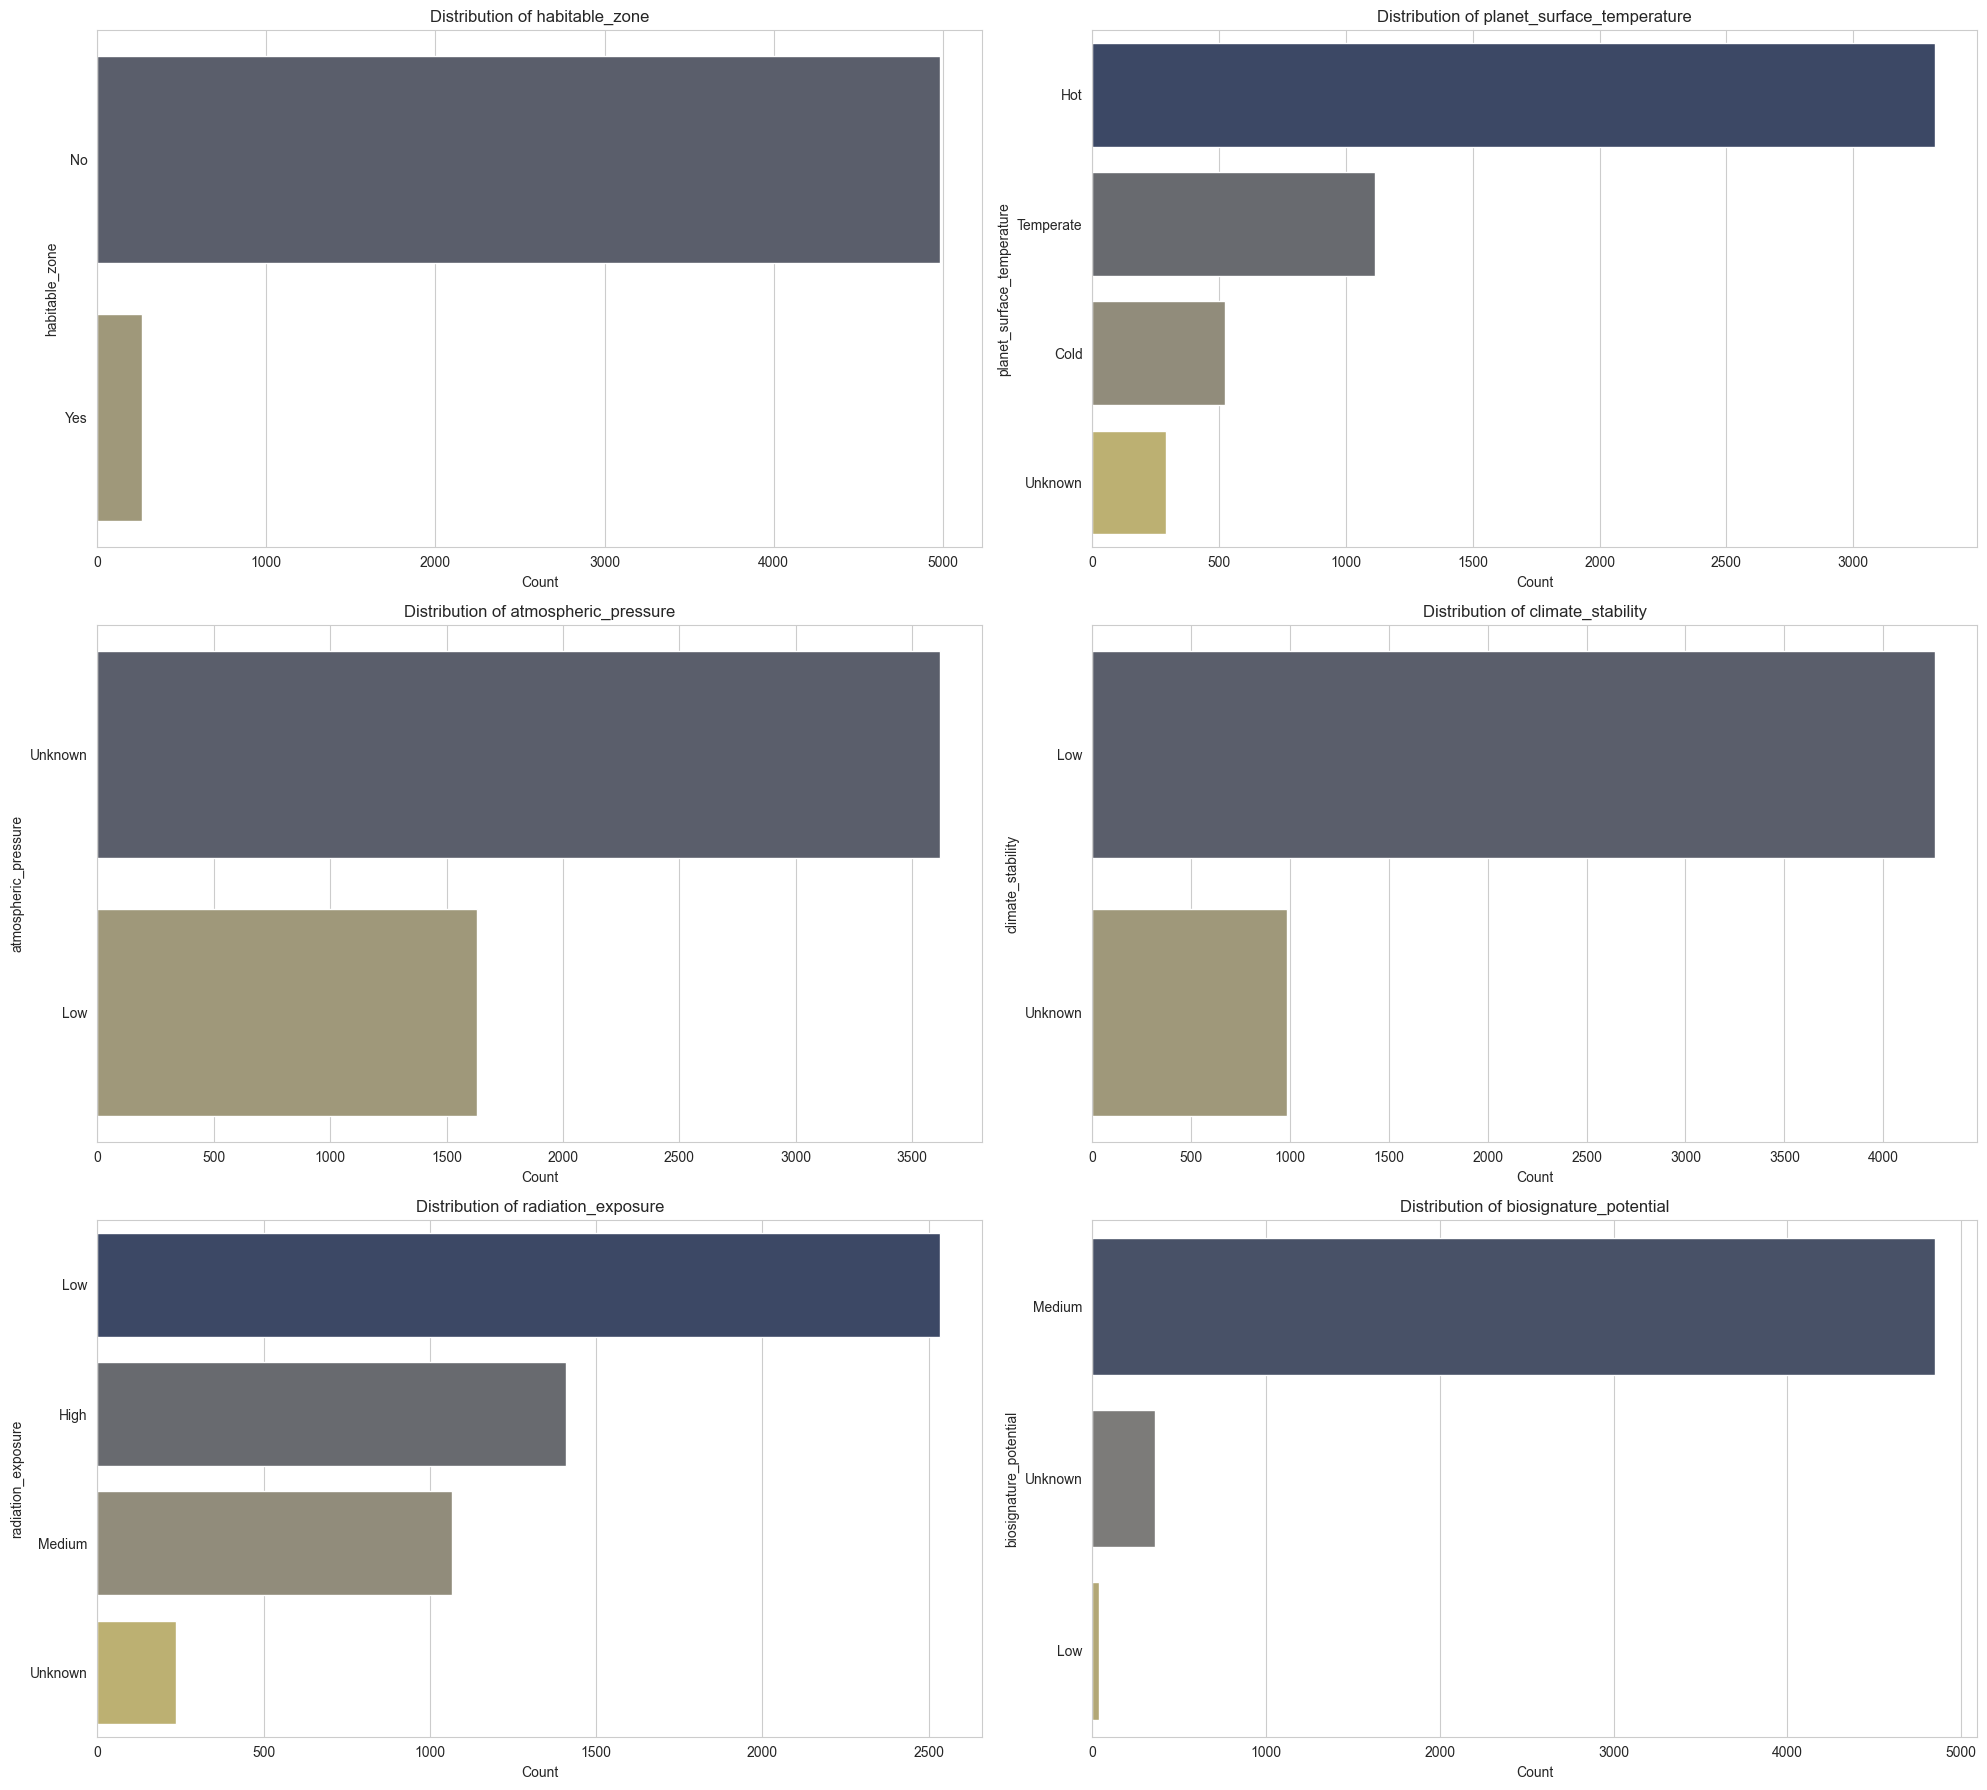

In [9]:
# Habitability-related columns
habitability_columns = ['habitable_zone', 'planet_surface_temperature', 'atmospheric_pressure',
                        'climate_stability', 'radiation_exposure', 'biosignature_potential']

plt.figure(figsize=(20, 18))

for i, col in enumerate(habitability_columns, 1):
    plt.subplot(3, 2, i)

    # If column is categorical, use a count plot
    if data[col].dtype == 'object':
        sns.countplot(y=data[col], order=data[col].value_counts().index, palette="cividis")
        plt.ylabel(col)
        plt.xlabel('Count')
    # If column is numerical, use a histogram
    else:
        sns.histplot(data[col], kde=True, color='purple', bins=30)
        plt.xlabel(col)
        plt.ylabel('Frequency')

    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

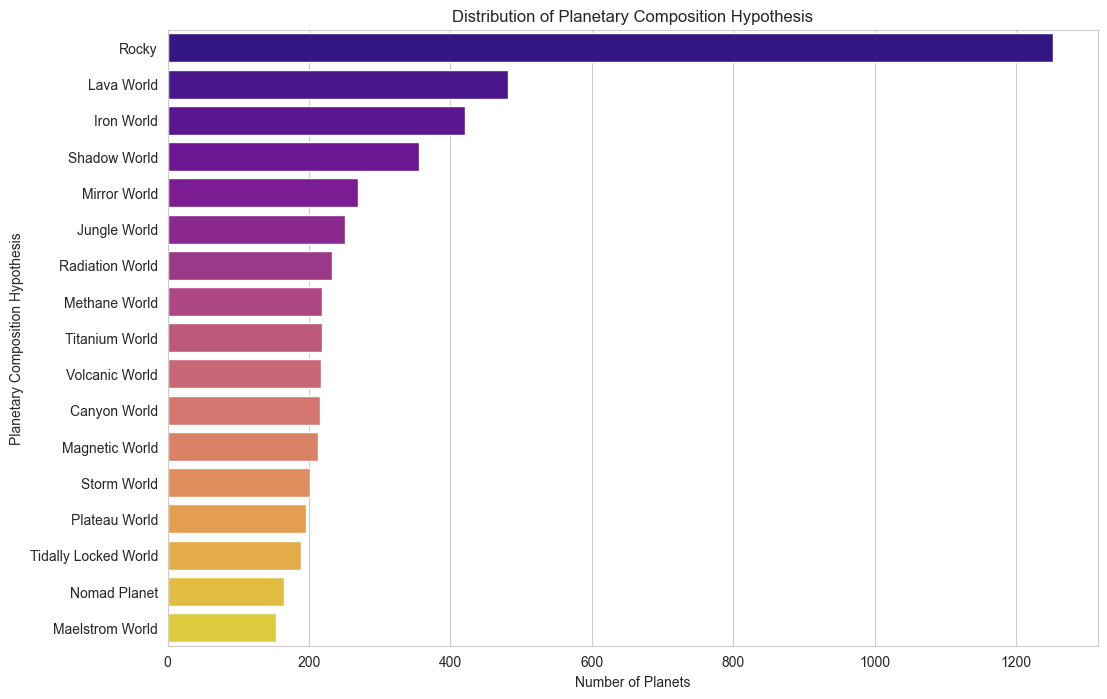

In [11]:
# Visualizing distribution of planetary composition hypothesis
plt.figure(figsize=(12, 8))
sns.countplot(y="combined_planetary_composition_hypothesis", data=data, order=data["combined_planetary_composition_hypothesis"].value_counts().index, palette="plasma")
plt.title("Distribution of Planetary Composition Hypothesis")
plt.xlabel("Number of Planets")
plt.ylabel("Planetary Composition Hypothesis")
plt.show()

In [12]:
data.drop(['planetary_composition_hypothesis'], axis=1)

,name,distance,stellar_magnitude,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,...,approximated_mass,approximated_radius,planet_gravity,climate_stability,possibility_of_moon,atmospheric_density,normalized_orbital_radius,energy_receipt_score,planetary_energy_receipt,combined_planetary_composition_hypothesis
0,11 Comae Berenices b,304.0,4.72307,2007,19.40000,1.898000e+27,1.080,71492.0,1.290000,0.892539,...,3.682120e+28,77211.360,4.122130e+08,Unknown,High,Medium,0.999829,1.087877,Extremely Low,Iron World
1,11 Ursae Minoris b,409.0,5.01300,2009,14.74000,1.898000e+27,1.090,71492.0,1.530000,1.400000,...,2.797652e+28,77926.280,3.074766e+08,Unknown,High,Medium,0.999797,1.094474,Extremely Low,Iron World
2,14 Andromedae b,246.0,5.23133,2008,4.80000,1.898000e+27,1.150,71492.0,0.830000,0.508693,...,9.110400e+27,82215.800,8.995247e+07,Unknown,High,Medium,0.999890,1.099559,Extremely Low,Iron World
3,14 Herculis b,58.0,6.61935,2002,8.13881,1.898000e+27,1.120,71492.0,2.773069,4.800000,...,1.544746e+28,80071.040,1.608023e+08,Low,High,Medium,0.999631,1.131035,Extremely Low,Iron World
4,16 Cygni B b,69.0,6.21500,1996,1.78000,1.898000e+27,1.200,71492.0,1.660000,2.200000,...,3.378440e+27,85790.400,3.063550e+07,Unknown,High,Medium,0.999779,1.121939,Extremely Low,Shadow World
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5245,XO-7 b,764.0,10.52100,2019,0.70900,1.898000e+27,1.373,71492.0,0.044210,0.007940,...,1.345682e+27,98158.516,9.321218e+06,Unknown,Medium,Low,0.999995,1.220604,Low,Mirror World
5246,YSES 2 b,357.0,10.88500,2021,6.30000,1.898000e+27,1.140,71492.0,115.000000,1176.500000,...,1.195740e+28,81500.880,1.201430e+08,Low,High,Medium,0.984680,1.213611,Low,Iron World
5247,YZ Ceti b,12.0,12.07400,2017,0.70000,5.972000e+24,0.913,6371.0,0.016340,0.005476,...,4.180400e+24,5816.723,8.246075e+06,Low,Low,Unknown,0.999998,1.256114,Somewhat Low,Canyon World
5248,YZ Ceti c,12.0,12.07400,2017,1.14000,5.972000e+24,1.050,6371.0,0.021560,0.008487,...,6.808080e+24,6689.550,1.015353e+07,Low,Low,Unknown,0.999998,1.256114,Somewhat Low,Rocky


In [13]:
data.to_csv('cleaned_exoplanets.csv', index=False)

In [14]:
# # Convert DataFrame to a list of dictionaries
data_dict_list = data.to_dict(orient='records')

# Save the list of dictionaries as a JSON file
with open('cleaned_exoplanet_2.json', 'w') as json_file:
    json.dump(data_dict_list, json_file, indent=4)